In [1]:
%pylab inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Populating the interactive namespace from numpy and matplotlib


In [3]:
data=loadtxt('bmw.csv', delimiter=',')

In [4]:
data

array([[ 2.        ,  0.70686266, -0.37415746],
       [ 3.        ,  0.78849033,  0.08617711],
       [ 3.        , -0.54685657, -0.18698829],
       ...,
       [ 0.        , -0.15688985,  0.17557256],
       [ 1.        ,  0.52535032,  0.81133209],
       [ 2.        ,  0.73897575, -0.08725453]])

In [5]:
data.dtype

dtype('float64')

In [6]:
y_train, x_train = data[:,0].astype(uint8), data[:,1:]

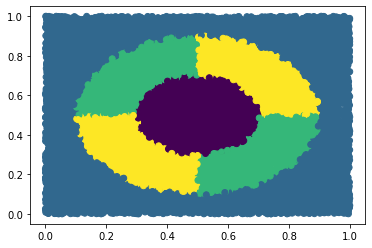

In [14]:
scatter(x_train[:,0], x_train[:,1], c=y_train)

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle, class_weight

In [10]:
scaler=MinMaxScaler()

In [13]:
x_train = scaler.fit_transform(x_train)

In [16]:
x_train, y_train = shuffle(x_train, y_train)

(array([2101.,    0.,    0., 8157.,    0.,    0., 3041.,    0.,    0.,
        3085.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

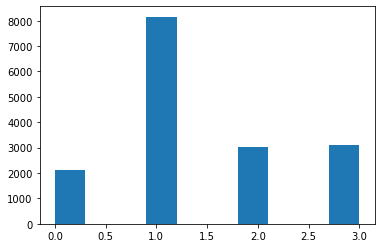

In [17]:
hist(y_train)

In [18]:
unique(y_train)

array([0, 1, 2, 3], dtype=uint8)

In [20]:
class_weight.compute_class_weight('balanced', classes=unique(y_train), y=y_train)

array([1.94954783, 0.5021454 , 1.34692535, 1.32771475])

In [23]:
for x in zip(unique(y_train), class_weight.compute_class_weight('balanced', classes=unique(y_train), y=y_train)):
    print(x)

(0, 1.9495478343645882)
(1, 0.5021453965918843)
(2, 1.3469253535021375)
(3, 1.3277147487844407)


In [25]:
class_weights=dict(zip(unique(y_train), class_weight.compute_class_weight('balanced', classes=unique(y_train), y=y_train)))

In [27]:
# tf.nn.

In [44]:
model = keras.models.Sequential()
model.add(layers.Dense(10, input_shape=(2,), activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
Total params: 154
Trainable params: 154
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# keras.optimizers.

In [ ]:
# keras.losses.categorical_crossentropy

In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(x_train, y_train, batch_size=16, epochs=10, validation_split=0.2, class_weight=class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 13107 samples, validate on 3277 samples
Epoch 1/10
13107/13107 [==============================] - 5s 415us/sample - loss: 1.0096 - accuracy: 0.6031 - val_loss: 0.8992 - val_accuracy: 0.6292
Epoch 2/10
13107/13107 [==============================] - 5s 399us/sample - loss: 0.7574 - accuracy: 0.7483 - val_loss: 0.6242 - val_accuracy: 0.8013
Epoch 3/10
13107/13107 [==============================] - 6s 435us/sample - loss: 0.5176 - accuracy: 0.8653 - val_loss: 0.4394 - val_accuracy: 0.8947
Epoch 4/10
13107/13107 [==============================] - 6s 423us/sample - loss: 0.3821 - accuracy: 0.8931 - val_loss: 0.3389 - val_accuracy: 0.9127
Epoch 5/10
13107/13107 [==============================] - 5s 382us/sample - loss: 0.3113 - accuracy: 0.9036 - val_loss: 0.2849 - val_accuracy: 0.9136
Epoch 6/10
13107/13107 [==============================] - 6s 482us/sample - loss: 0.2673 - accuracy: 0.9167 - val_loss: 0.2527 - val_accuracy: 0.9097
E

In [50]:
model.predict(array([0.1,0.1]).reshape(-1,2))

array([[3.4168376e-17, 9.9986756e-01, 8.2385206e-08, 1.3226531e-04]],
      dtype=float32)

In [51]:
model.evaluate(x_train, y_train)

16384/16384 [==============================] - 2s 104us/sample - loss: 0.1676 - accuracy: 0.9485


[0.16756427082873415, 0.94854736]